<a href="https://www.kaggle.com/code/ioannisf/diabetes-dataanalysis-regression?scriptVersionId=90456869" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-data-set/diabetes.csv


**IMPORT LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as plt
from scipy import stats

from pylab import rcParams

In [3]:
rcParams['figure.figsize'] = 8, 6
sb.set_style('whitegrid')

**READ DATA**

In [4]:
df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

Lets take a glance of our data

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**From the above we understand that we have:**
  1. dataframe shape (768, 9)
  2. All the features types are correct 
  3. We dont have NA's

**Lets see the statistics** 

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


1. We can easy see that there are some illogical observations, such as BMI = 0.0, Insulin = 0.0,...etc. So, now we have to clear our dataset from these observations. The best way, so as not to lose enough information is to replace zeros with the mean of their correspoding column.
2. 'Insulin' have very high standard deviation which means data is distributed in a larger range. 

We are going to replace the zero values with the mean of their feutures.

In [9]:
df['Glucose'] = df['Glucose'].replace(0,df['BMI'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0,df['BMI'].mean())
df['SkinThickness'] = df['SkinThickness'].replace(0,df['BMI'].mean())
df['Insulin'] = df['Insulin'].replace(0,df['BMI'].mean())
df['BMI'] = df['BMI'].replace(0,df['BMI'].mean())

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.102816,70.563464,29.992598,95.379198,32.450805,0.471876,33.240885,0.348958
std,3.369578,31.280192,14.746220,8.886011,105.106957,6.875374,0.331329,11.760232,0.476951
min,0.000000,31.992578,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,25.000000,31.992578,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,31.992578,31.996289,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


All zeros dissapeard. Lets now search for outliers.

<AxesSubplot:>

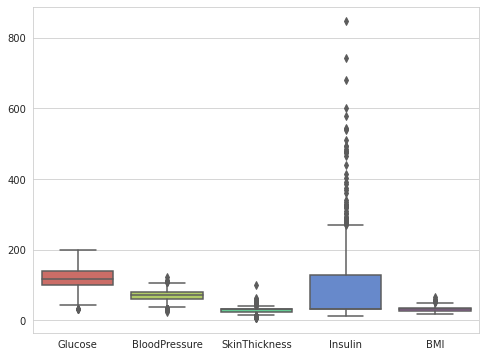

In [11]:
sb.boxplot(data=df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], palette='hls')

**BOXPLOTS**

Insulin has plenty of outliers. We should find a way to get rid of them.

First i apply the z score method so as to delete some of the outliers.

In [12]:
z_scores = stats.zscore(df)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df_new = df[filtered_entries]

<AxesSubplot:>

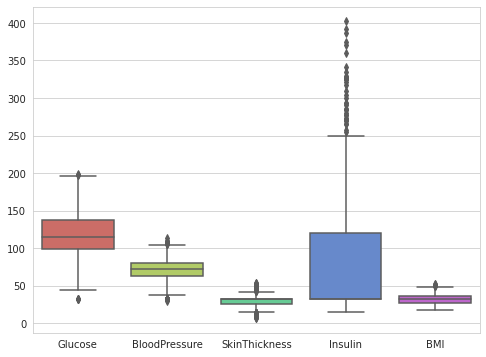

In [13]:
sb.boxplot(data=df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], palette='hls')

Since the outliers havent disapeard at all, i will apply another one method so as to reduce the outliers to minimum. 

In [14]:
print(df_new['Insulin'].quantile(0.10))
print(df_new['Insulin'].quantile(0.90))

31.992578124999977
192.80000000000007


In [15]:
df_new["Insulin"] = np.where(df_new["Insulin"] > 192.80, 192.80,df_new['Insulin'])
print(df_new['Insulin'].skew())

0.93803816442777


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<AxesSubplot:>

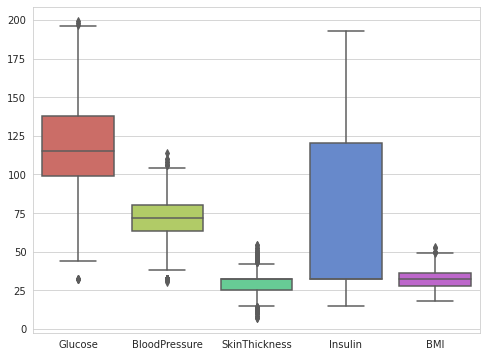

In [16]:
sb.boxplot(data=df_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']], palette='hls')

In [17]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.857538,119.622355,70.493427,29.650556,77.020340,32.176256,0.449281,32.972337,0.337483
std,3.294906,30.657260,14.479528,8.286268,59.180623,6.501435,0.282582,11.313919,0.473178
min,0.000000,31.992578,30.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,25.000000,31.992578,27.450000,0.242000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,31.992578,31.992578,32.000000,0.362000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.150000,0.600500,40.000000,1.000000
max,13.000000,199.000000,114.000000,54.000000,192.800000,52.900000,1.461000,68.000000,1.000000


With this method we have replaced all the values which are bigger than 192.8 with 192.8

Now we will do the same thing to the SkinThickness feuture.

In [18]:
print(df_new['SkinThickness'].quantile(0.90))

40.0


In [19]:
df_new["SkinThickness"] = np.where(df_new["SkinThickness"] > 40, 40,df_new["SkinThickness"])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df_new.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000,723.000000
mean,3.857538,119.622355,70.493427,29.248067,77.020340,32.176256,0.449281,32.972337,0.337483
std,3.294906,30.657260,14.479528,7.559060,59.180623,6.501435,0.282582,11.313919,0.473178
min,0.000000,31.992578,30.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.000000,25.000000,31.992578,27.450000,0.242000,24.000000,0.000000
50%,3.000000,115.000000,72.000000,31.992578,31.992578,32.000000,0.362000,29.000000,0.000000
75%,6.000000,138.000000,80.000000,32.000000,120.000000,36.150000,0.600500,40.000000,1.000000
max,13.000000,199.000000,114.000000,40.000000,192.800000,52.900000,1.461000,68.000000,1.000000


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

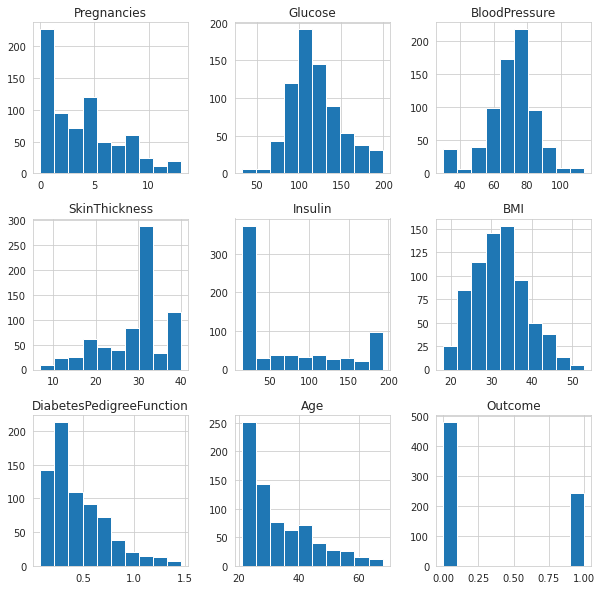

In [21]:
df_new.hist(bins = 10, figsize = (10,10))

Things seems to be good, and clinical acceptable.

The next step is to check the correlation between the feutures.

Since our data does not follow the Gaussian distribution, ill check if they are correlated with the spearman method.

<AxesSubplot:>

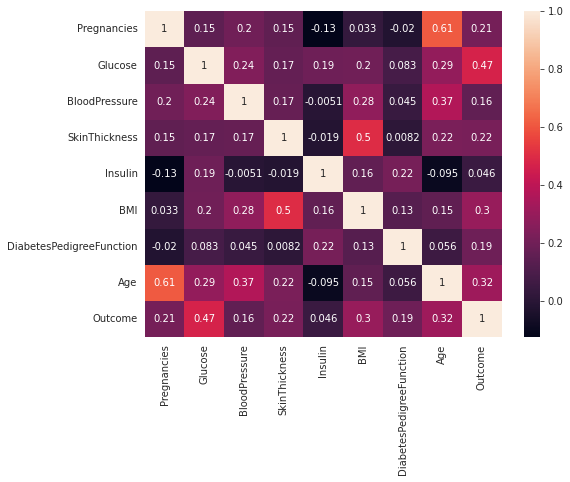

In [22]:
corr_matrix = df_new.corr(method='spearman')
sb.heatmap(corr_matrix,annot = True)

From the hitmap we can see that the Glucose, is the only feature which have a moderate relation with the outcome. Also BMI and Age have a mild relation with the result, having or not diabetes. All the other feautures have week correlation with the outcom. On the other hand, Pregnancies have large ralation with Age, and BMI have also large relation with SkinThickness. Lest get more informations with the scatter plots.

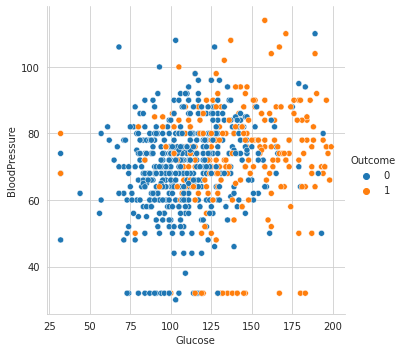

In [23]:
sb.relplot(x = "Glucose", y = "BloodPressure", hue = "Outcome", data = df_new)

From the above scatter plot we can understant that the higher the Glucose the more possible is to be diabetic, regardless the bloodPressure levels.

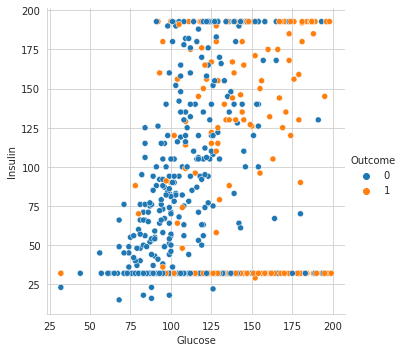

In [24]:
sb.relplot(x = "Glucose", y = "Insulin", hue = "Outcome", data = df_new)

Insuline doesnt seem to affects the Glucose levels.

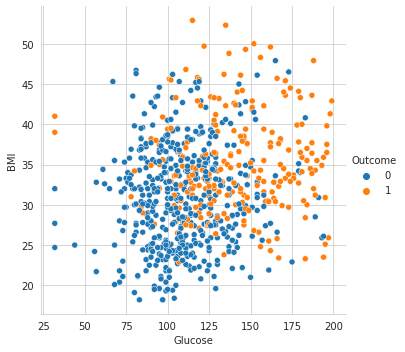

In [25]:
sb.relplot(x = "Glucose", y = "BMI", hue = "Outcome", data = df_new)

As the Glocuse and BMI getting higher, it is more possible to be diabetic.

**REGRESSION**

**Before we start with the predictions we should see if the outcomes are balanced**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Outcome', ylabel='count'>

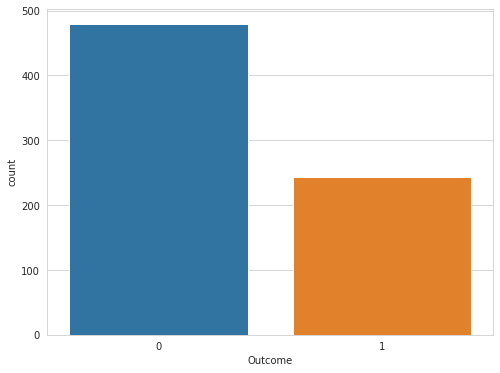

In [26]:
sb.countplot("Outcome", data = df_new)

In [27]:
sum_1 = 0 
sum_0 = 0
for i in df_new['Outcome']:
    if i == 1:
        sum_1 += 1
    else:
        sum_0 += 1
print("{} dont have diabetes".format(sum_0), "\n{} have diabetes".format(sum_1))

479 dont have diabetes 
244 have diabetes


**Clearly there is imbalance to our data**

In [28]:
X = df_new.drop(columns='Outcome') # Features
y = df_new['Outcome'] # Lables

Since we have impbalance data we should apply a method to balance them.

In [29]:
from collections import Counter
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 244), (1, 244)]


In [30]:
X_resampled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,4.129098,126.128971,71.423026,29.644847,84.728050,33.026886,0.478635,34.522541
std,3.371236,32.839589,15.070369,7.562245,61.707843,6.431935,0.282918,11.605931
min,0.000000,31.992578,30.000000,7.000000,15.000000,18.900000,0.085000,21.000000
25%,1.000000,102.916667,64.000000,26.000000,31.992578,28.700000,0.264833,25.000000
50%,3.000000,123.000000,72.000000,31.992578,53.500000,32.750000,0.395000,31.000000
75%,7.000000,148.000000,80.000000,33.000000,135.583333,37.200000,0.626250,42.000000
max,13.000000,199.000000,114.000000,40.000000,192.800000,52.900000,1.461000,68.000000


**Now the data are balanced and the data's distribution didn't change. We are ready to go for the the model.**

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_resampled) 

In [32]:
from sklearn.model_selection import train_test_split

#train test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,  y_resampled, test_size= 0.20,random_state=0)

**LOGISTIC REGRATION**

In [33]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, n_jobs=-1).fit(X_train, y_train)      

accuracy = clf.score(X_test, y_test)
print("Accuracy: {}".format(accuracy*100.0))

Accuracy: 69.38775510204081


In [34]:
y_pred = clf.predict(X_test)

**CONFUSION MATRIX**

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

print("Accuracy_score is: {}".format(accuracy_score(y_test, y_pred))) 
print("Precision_score is: {}".format(precision_score(y_test, y_pred))) # Precision = TruePositives / (TruePositives + FalsePositives).
print("Recall_score is: {}".format(recall_score(y_test, y_pred))) # Recall = TruePositives / (TruePositives + FalseNegatives) 
                                                                # quantifies the number of positive class predictions made out of all positive examples in the dataset.
print("F1_score is: {}".format(f1_score(y_test, y_pred))) # provides a single score that balances both the concerns of precision and recall in one number.

#Precision: Appropriate when minimizing false positives is the focus.
#Recall: Appropriate when minimizing false negatives is the focus.

Accuracy_score is: 0.6938775510204082
Precision_score is: 0.7209302325581395
Recall_score is: 0.6326530612244898
F1_score is: 0.6739130434782609


In [36]:
print("Confusion Matrix: \n{}".format(confusion_matrix(y_test, y_pred)))

Confusion Matrix: 
[[37 12]
 [18 31]]


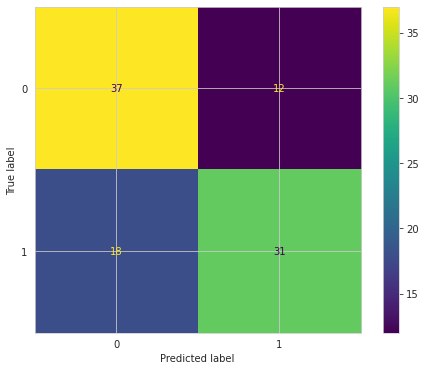

In [37]:
print("\n")
plot_confusion_matrix(clf, X_test, y_test)

**From the above, we can understand that we have a model with accuracy 69% and F1-score 67%, which can predict correctly that an individual dont have diabetes 370 out of 490 and also predict that someone who have diabetes, actually have 310 out of 490.**

**I've also checked how the model works without any method of undesampling or oversampilng and get the follow results. (I only used the "class_weight" option of the LoggisticRegression)**

Accuracy_score is: 0.7172413793103448 # Without any method

Precision_score is: 0.5833333333333334

Recall_score is: 0.6862745098039216

F1_score is: 0.6306306306306307

**And these results are with oversampling method, which was the worst option**

Accuracy_score is: 0.65625   # Oversampling

Precision_score is: 0.6923076923076923

Recall_score is: 0.6237623762376238

F1_score is: 0.6562500000000001